<a href="https://colab.research.google.com/github/Pranavi210/job-salaries-analysis-/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Jio - Jio Prepaid Planes.csv')
print(df.head())
print(df.info())

   Days  Price  Price/Day  For 365 Days  Profit per customer  \
0    28    209   7.464286   2724.464286             5.214286   
1    24    179   7.458333   2722.291667             3.041667   
2    20    149   7.450000   2719.250000             0.000000   
3   336   2545   7.574405   2764.657738             0.000000   
4    84    666   7.928571   2893.928571           129.270833   

   From 400 Million users  Data_per_day  
0             2085.714286           1.0  
1             1216.666667           1.0  
2                0.000000           1.0  
3                0.000000           1.5  
4            51708.333330           1.5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Days                    16 non-null     int64  
 1   Price                   16 non-null     int64  
 2   Price/Day               16 non-null     floa

In [ ]:

print(df.isnull().sum())
print(df.describe())


Days                      0
Price                     0
Price/Day                 0
For 365 Days              0
Profit per customer       0
From 400 Million users    0
Data_per_day              0
dtype: int64
             Days        Price  Price/Day  For 365 Days  Profit per customer  \
count   16.000000    16.000000  16.000000     16.000000            16.000000   
mean    76.687500   663.812500   9.306167   3396.750914           306.361219   
std    109.140716   845.097645   2.320658    847.040309           345.420462   
min     14.000000   119.000000   7.450000   2719.250000             0.000000   
25%     23.750000   206.500000   7.809355   2850.414434             2.281250   
50%     28.000000   279.000000   8.544643   3118.794643           294.933036   
75%     63.000000   566.250000   9.808036   3579.933035           388.228132   
max    365.000000  2879.000000  14.964286   5461.964286          1072.521739   

       From 400 Million users  Data_per_day  
count               16.0

In [ ]:

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price/Day'] = pd.to_numeric(df['Price/Day'], errors='coerce')
df['For 365 Days'] = pd.to_numeric(df['For 365 Days'], errors='coerce')
df['Profit per customer'] = pd.to_numeric(df['Profit per customer'], errors='coerce')
df['From 400 Million users'] = pd.to_numeric(df['From 400 Million users'], errors='coerce')
df['Data_per_day'] = pd.to_numeric(df['Data_per_day'], errors='coerce')

df = df.dropna()

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Days                    16 non-null     int64  
 1   Price                   16 non-null     int64  
 2   Price/Day               16 non-null     float64
 3   For 365 Days            16 non-null     float64
 4   Profit per customer     16 non-null     float64
 5   From 400 Million users  16 non-null     float64
 6   Data_per_day            16 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 1.0 KB
None


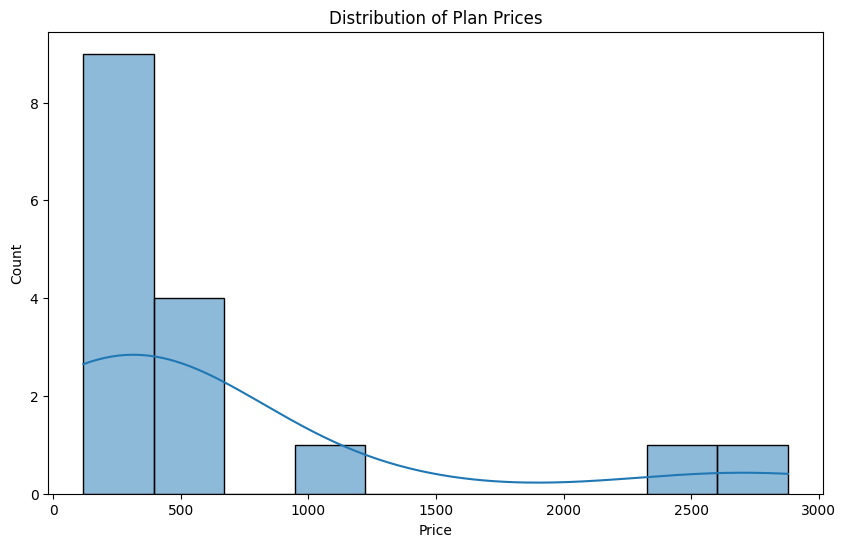

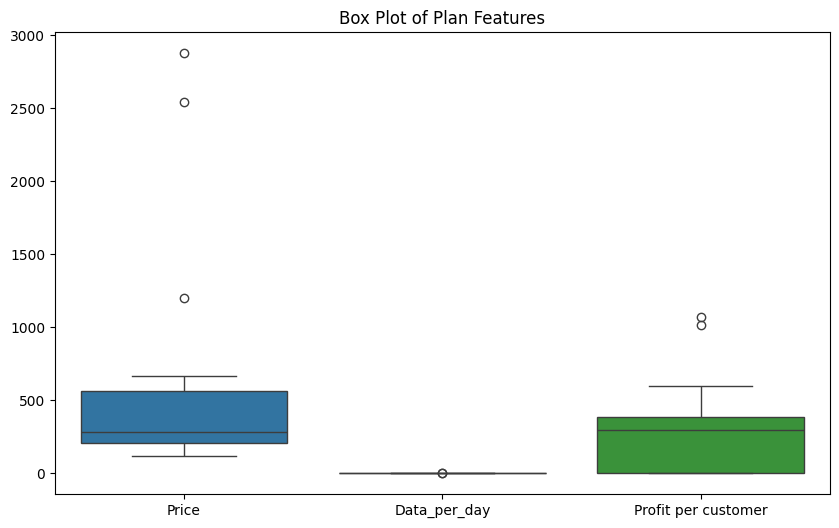

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Plan Prices')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Price', 'Data_per_day', 'Profit per customer']])
plt.title('Box Plot of Plan Features')
plt.show()


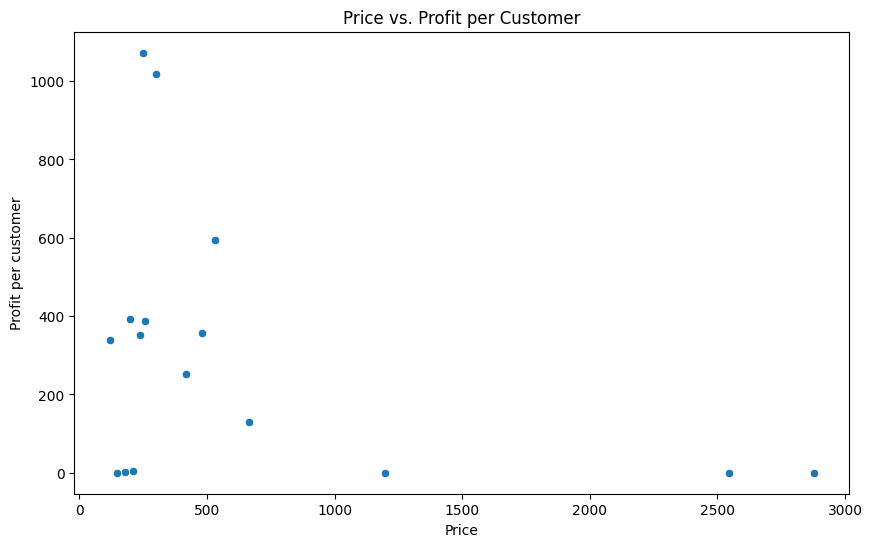

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Profit per customer', data=df)
plt.title('Price vs. Profit per Customer')
plt.show()


<Figure size 1000x600 with 0 Axes>

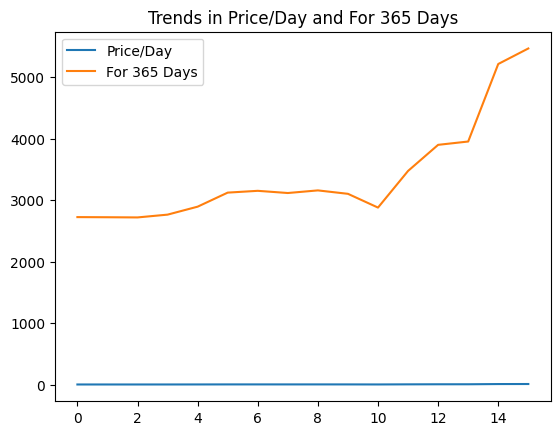

In [ ]:

plt.figure(figsize=(10, 6))
df[['Price/Day', 'For 365 Days']].plot(kind='line')
plt.title('Trends in Price/Day and For 365 Days')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


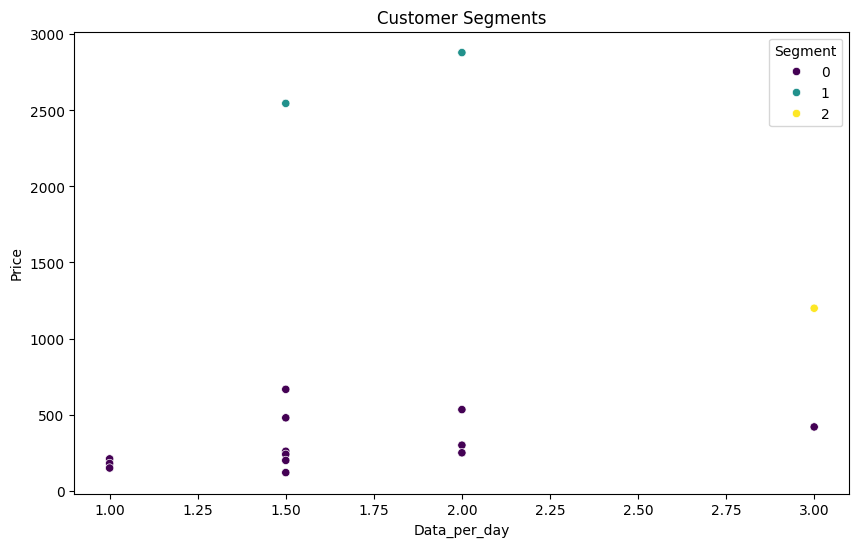

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(df[['Data_per_day', 'Price']])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Data_per_day', y='Price', hue='Segment', data=df, palette='viridis')
plt.title('Customer Segments')
plt.show()


In [ ]:

avg_profit_per_segment = df.groupby('Segment')['Profit per customer'].mean()
print(avg_profit_per_segment)


Segment
0    377.059962
1      0.000000
2      0.000000
Name: Profit per customer, dtype: float64


In [ ]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(df['Price'], df['Profit per customer'])
print(f'Price Elasticity of Demand: {slope}')


Price Elasticity of Demand: -0.15851087931093405


In [ ]:

df = df.dropna()

X = df[['Price', 'Days', 'Data_per_day']]
y = df['Profit per customer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')



Mean Squared Error: 97316.20370839178
R^2 Score: 0.4370897506991305


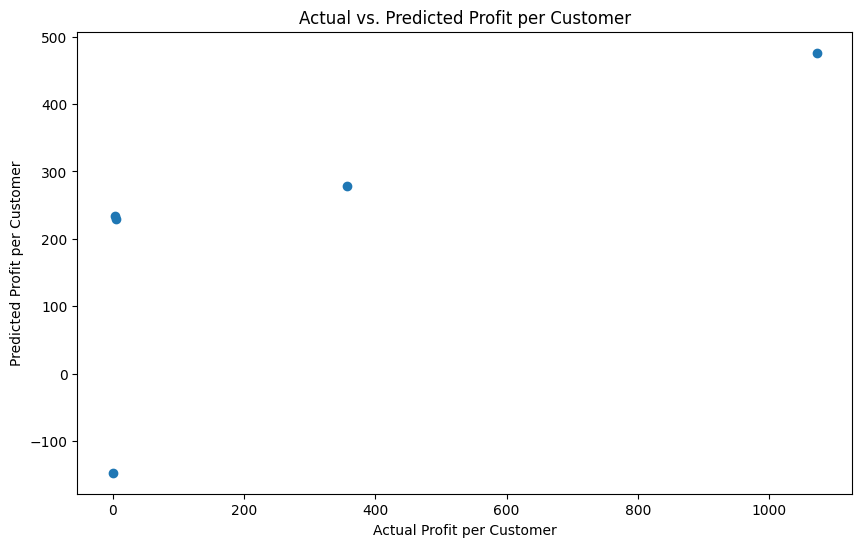

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Profit per Customer')
plt.ylabel('Predicted Profit per Customer')
plt.title('Actual vs. Predicted Profit per Customer')
plt.show()
